In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data Colection and processing

In [ ]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
data.shape

(614, 13)

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
data.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
5               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[480 rows x 13 columns]>

In [ ]:
data.shape

(480, 13)

In [ ]:
data.replace({'Loan_Status':{"N":0,'Y':1}},inplace=True)

<ipython-input-10-5534ba66b9a2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Loan_Status':{"N":0,'Y':1}},inplace=True)


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
data=data.replace(to_replace='3+', value=4)

In [ ]:
data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

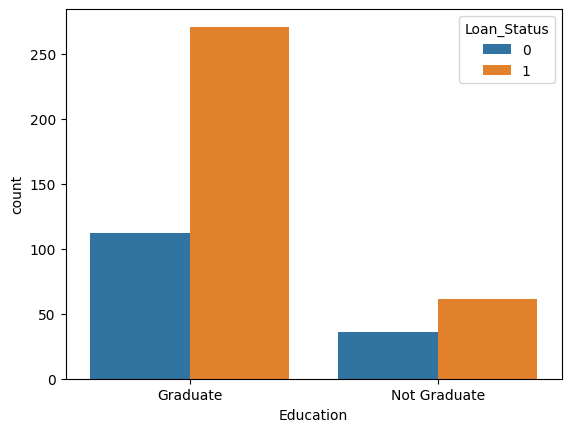

In [ ]:
sns.countplot(x='Education',hue='Loan_Status', data=data)

<Axes: xlabel='Property_Area', ylabel='count'>

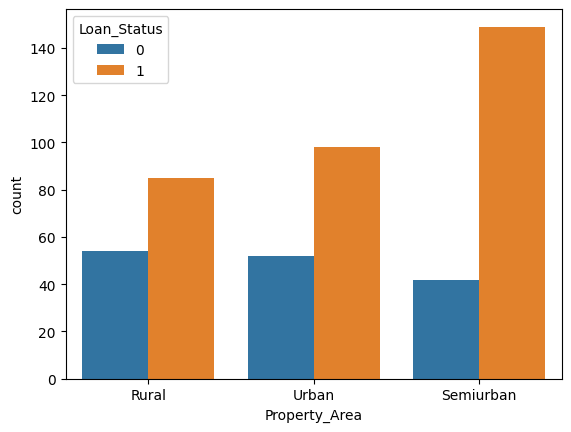

In [ ]:
sns.countplot(x='Property_Area',hue='Loan_Status', data=data)

<Axes: xlabel='Married', ylabel='count'>

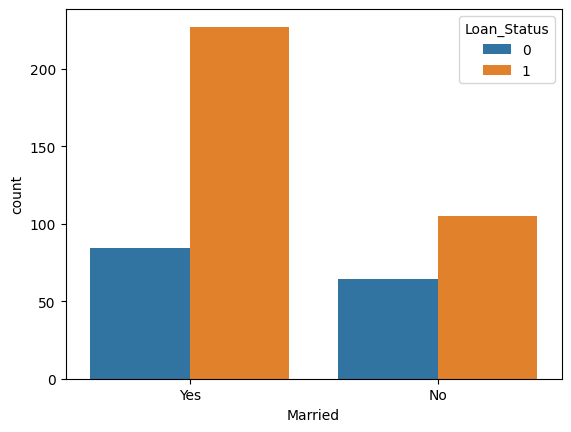

In [ ]:
sns.countplot(x='Married',hue='Loan_Status', data=data)

In [ ]:
correlation = data.select_dtypes(include=[np.number]).corr()


In [ ]:
data['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [ ]:
data.replace({'Married':{'No':0,"Yes":1},'Gender':{'Male':0,"Female":1},'Education':{"Graduate":0,"Not Graduate":1},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)

<ipython-input-23-e3ba301fbb49>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Married':{'No':0,"Yes":1},'Gender':{'Male':0,"Female":1},'Education':{"Graduate":0,"Not Graduate":1},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 52.5+ KB


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


split X and Y

In [ ]:
X=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=data['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          0              0             4583   
2         0        1          0          0              1             3000   
3         0        1          0          1              0             2583   
4         0        0          0          0              0             6000   
5         0        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          0              0             2900   
610       0        1          4          0              0             4106   
611       0        1          1          0              0             8072   
612       0        1          2          0              0             7583   
613       1        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X_test.shape,X_test.shape,data.shape)

(48, 11) (48, 11) (480, 13)


# Model Evaluation

In [ ]:
model=svm.SVC(kernel='linear')

In [ ]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
X_train_pred=model.predict(X_train)

NameError: name 'model' is not defined

In [ ]:
X_train_accuracy=accuracy_score(X_train_pred,Y_train)

In [ ]:
X_test_pred=model.predict(X_test)

In [ ]:
X_test_accuracy=accuracy_score(X_test_pred,Y_test)

In [ ]:
print('X_train_accuracy_score:',X_train_accuracy)

X_train_accuracy_score: 0.7731481481481481


In [ ]:
X_test_pred=model.predict(X_test)

In [ ]:
print('X_test_accuracy_score:',X_test_accuracy)

X_test_accuracy_score: 0.8333333333333334


# check the model

In [ ]:
input=(0,1,0,0,1,3000,0.0,66.0,360.0,1.0,1)
input_numpy_array=np.asarray(input)
input_reshape=input_numpy_array.reshape(1,-1)
prediction=model.predict(input_reshape)
print(prediction)
if(prediction[0]==0):
  print("The person has nor approved loan")
else:
  print("The person hass approved loan")

[1]
The person hass approved loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
